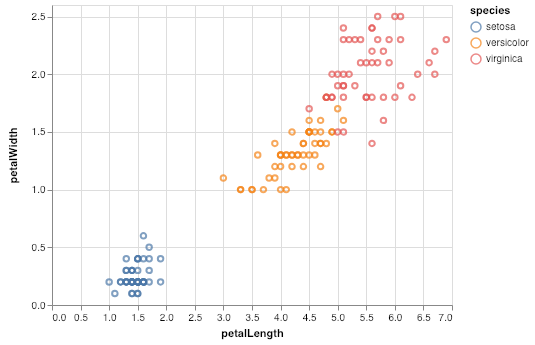

In [1]:
import altair as alt
from vega_datasets import data

iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)


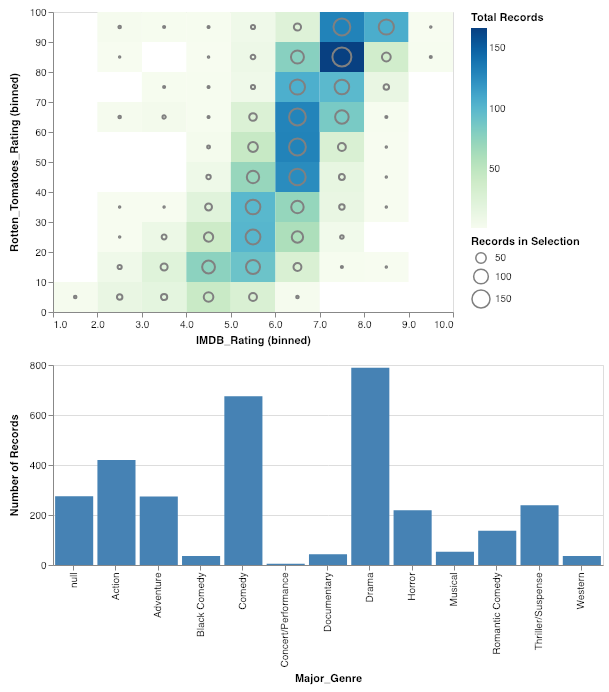

In [2]:
import altair as alt
from vega_datasets import data

source = data.movies.url

pts = alt.selection(type="single", encodings=['x'])

rect = alt.Chart(data.movies.url).mark_rect().encode(
    alt.X('IMDB_Rating:Q', bin=True),
    alt.Y('Rotten_Tomatoes_Rating:Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='Total Records')
    )
)

circ = rect.mark_point().encode(
    alt.ColorValue('grey'),
    alt.Size('count()',
        legend=alt.Legend(title='Records in Selection')
    )
).transform_filter(
    pts
)

bar = alt.Chart(source).mark_bar().encode(
    x='Major_Genre:N',
    y='count()',
    color=alt.condition(pts, alt.ColorValue("steelblue"), alt.ColorValue("grey"))
).properties(
    selection=pts,
    width=550,
    height=200
)

alt.vconcat(
    rect + circ,
    bar
).resolve_legend(
    color="independent",
    size="independent"
)
